In [10]:
from typing import List, Dict, TypedDict
from langgraph.graph import StateGraph

In [11]:
class AgentState(TypedDict):
    name: str
    age: str
    final: str
    

In [12]:
def first_node(state: AgentState) -> AgentState:
    "First Node of the Sequential Agent"
    state["final"] = f"Hi, {state["name"]}!"
    return state

def second_node(state: AgentState) -> AgentState:
    "Second Node of the Sequential Agent"
    state["final"] = state["final"] + f" You are {state["age"]} years old"
    return state

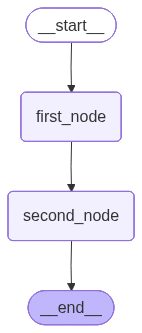

In [13]:
graph = StateGraph(AgentState)
graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)
graph.set_entry_point("first_node")
graph.add_edge("first_node", "second_node")
graph.set_finish_point("second_node")

app = graph.compile()

from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [14]:

result = app.invoke({"name": "John", "age": "30"})
print(result["final"])

Hi, John! You are 30 years old
